In [5]:
!pip3 install torch torchvision torchaudio

     ---------------------------------------- 1.1/1.1 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 2.2 MB/s eta 0:00:00


In [6]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
hint: core.useBuiltinFSMonitor will be deprecated soon; use core.fsmonitor instead
hint: Disable this message with "git config advice.useCoreFSMonitorConfig false"


In [7]:
!cd yolov5 & pip install -r requirements.txt

     -------------------------------------- 182.5/182.5 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 151.7/151.7 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 63.1/63.1 kB 1.1 MB/s eta 0:00:00


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\ASUS/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-11-20 Python-3.10.8 torch-1.13.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [4]:
img = 'https://asset.kompas.com/crops/RD-NkT2WbrhSQFeYPnQtqbbN-W4=/0x0:0x0/750x500/data/photo/2022/08/10/62f3a8ba57b9e.jpg'

In [5]:
results = model(img)
results.print()

image 1/1: 500x750 5 persons, 4 cars, 5 motorcycles
Speed: 178.5ms pre-process, 91.8ms inference, 2.0ms NMS per image at shape (1, 3, 448, 640)


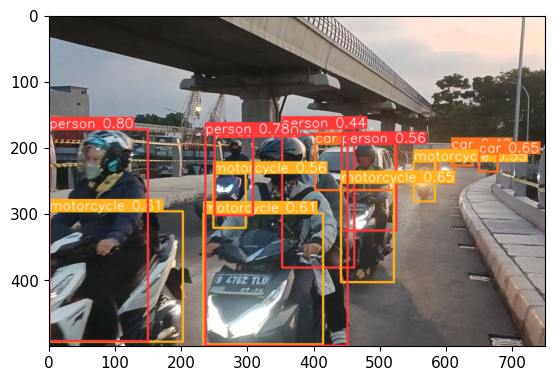

In [6]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [7]:
import uuid   # Unique identifier
import os
import time

In [8]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 5

In [11]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [12]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.1f1d0d16-69a7-11ed-b7cf-7c10c985ec77.jpg


In [13]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.221bbd45-69a7-11ed-b78a-7c10c985ec77.jpg
data\images\awake.221bbd46-69a7-11ed-940b-7c10c985ec77.jpg
data\images\awake.221bbd47-69a7-11ed-8cc8-7c10c985ec77.jpg
data\images\awake.221bbd48-69a7-11ed-9ba6-7c10c985ec77.jpg
data\images\awake.221bbd49-69a7-11ed-9ea6-7c10c985ec77.jpg
data\images\drowsy.221bbd4a-69a7-11ed-8bec-7c10c985ec77.jpg
data\images\drowsy.221bbd4b-69a7-11ed-947a-7c10c985ec77.jpg
data\images\drowsy.221bbd4c-69a7-11ed-85fe-7c10c985ec77.jpg
data\images\drowsy.221bbd4d-69a7-11ed-8385-7c10c985ec77.jpg
data\images\drowsy.221bbd4e-69a7-11ed-9d54-7c10c985ec77.jpg


In [14]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
hint: core.useBuiltinFSMonitor will be deprecated soon; use core.fsmonitor instead
hint: Disable this message with "git config advice.useCoreFSMonitorConfig false"


In [15]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

     ---------------------------------------- 6.8/6.8 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 78.3/78.3 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 50.1/50.1 MB 2.0 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
'pyrcc5' is not recognized as an internal or external command,
operable program or batch file.
